# 檔案

## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|

## 寫入

In [2]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
print(text,file=open('data.txt','w',encoding='utf-8'))

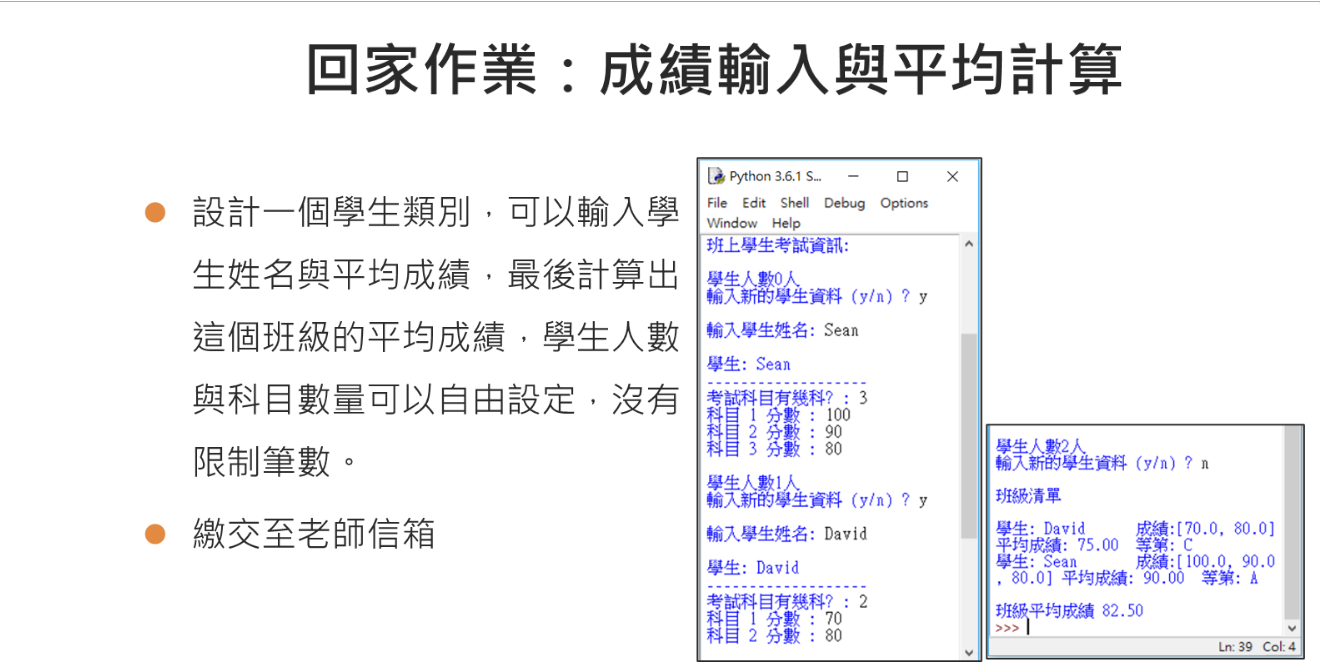

In [ ]:
class Student(object):
    def __init__(self, name):
        self.name, self.grades = name, []
    def append_grade(self, grade):
        self.grades.append(grade)
    def average(self):
        return sum(self.grades) / len(self.grades)
    def letter_grade(self):
        average = self.average()
        for value, grade in (90, "A"), (80, "B"), (70, "C"), (60, "D"):
            if average >= value:
                return grade
        else:
            return "F"
def print_report(a_class):
    print()
    print('班級清單')
    print()
    for student in a_class:
        print(f'學生: {student.name} 成績:{student.grades} 平均成績: {student.average():.2f}  等第: { student.letter_grade()}')
    print()
    print(f'班級平均成績 {class_average(a_class):.2f}')

def class_average(a_class):
    return sum(student.average() for student in a_class) / len(a_class)

print('班上學生考試資訊:')
a_class = []  # "class" by itself is a reserved word in Python, avoid using
while True:
    print()
    print(f'學生人數{len(a_class)}人')
    another_student = input('輸入新的學生資料 (y/n) ? ')
    if another_student[0].lower() != 'y':
        break
    print()
    student_name = input('輸入學生姓名: ')
    a_class.append(Student(student_name))
    print()
    print('學生:', student_name)
    print('-------------------')
    number_of_tests = int(input('考試科目有幾科? : '))
    for test_num in range(1, number_of_tests+1):
        print(f'科目 {test_num} 分數', end='')
        score = float(input(' : '))
        if score < 0:
            break
        a_class[-1].append_grade(score) 
print_report(a_class)

## 讀取

In [3]:
file = open('data.txt','r',encoding='UTF-8')
content = file.read()
print(content)
file.close()

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。




In [4]:
f = open('data1.txt','r',encoding='UTF-8')
result= list()
for line in f.readlines():
    line = line.strip()#移除前後空白
    if not len(line) or line.startswith('#'): # 如果是空白或是#就
        continue;
    result.append(line)    
result.sort()
print(result)
open('result-readline.txt','w',encoding='UTF-8').write('\n'.join(result))

['A', 'C', 'D', 'G']


7

## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料


### Read

In [5]:
import csv
f = open("example1.csv","r")
for row in csv.reader(f):
    if float(row[5]) > 100:
        print(row[0])
f.close()        

 104/01/03
 104/01/17
 104/01/30
 104/01/31


In [9]:
import csv
f = open("example.csv","r",encoding="utf-8")
for row in csv.DictReader(f):
  if float(row["漲跌點數"]) > 9.34:
     print(row["漲跌點數"])
f.close()        

101.17
29.59
47.89
85.83
117.46
12.61
173.72
109.67


In [10]:
import csv
f=open('example1.csv',"r",encoding='utf-8')
for row in csv.DictReader(f,['a','b','c','d','e','f']):#Csv 沒有欄位名稱時
 if float(row['f'])>71 :
    print(row['f'])
 else:
    print("error")
f.close( )

error
101.17
error
error
error
error
85.83
error
error
error
error
117.46
error
173.72
109.67


### Write
+ 必須加入 import csv
+ 利用 writer( ) 可寫入資料，寫入時注意
   + delimiter     這是代表分隔符號
   + quotechar   這是代表包住字串的符號
+ 使用 writerow( ) 方法進行特定的儲存格寫入

In [11]:
import csv
f=open('example.csv',"r",encoding='utf-8')
reader = csv.reader(f)
ofile = open('ttest.csv', "w",encoding='utf-8')
# quotechar 這是代表包住字串的符號 如果欄位中包含delimiter的符號就使用這個符號將它包住
writer = csv.writer(ofile, delimiter='-', quotechar='"')
for row in reader:
    writer.writerow(row)
f.close( )
ofile.close( )

### JSON
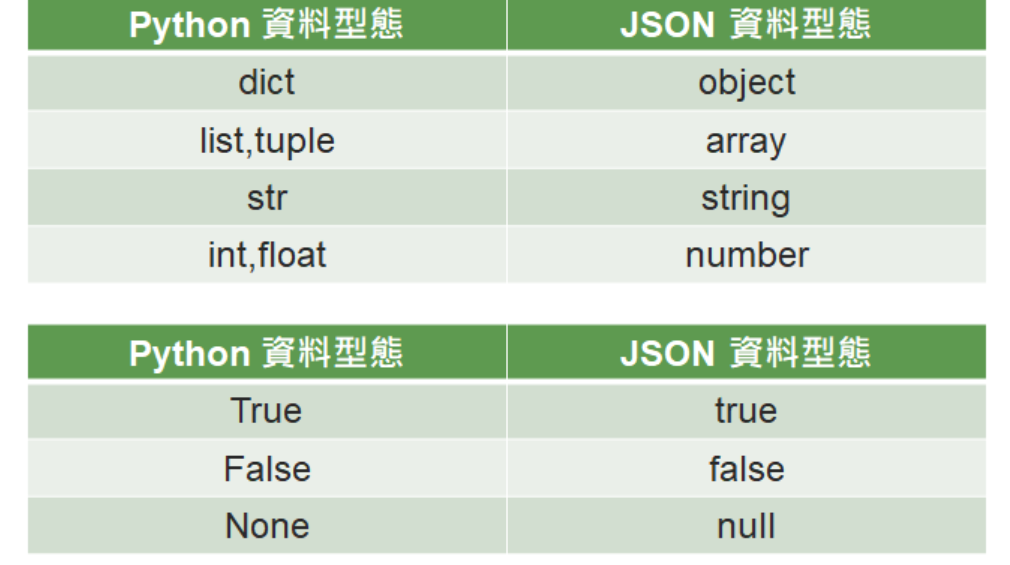
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [12]:
import json
json1 = {'python':'課程','gjun':100,'python-class':True,'ICQ':None}
json2 = json.dumps(json1,ensure_ascii=False)
print(json2)

{"python": "課程", "gjun": 100, "python-class": true, "ICQ": null}


In [16]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})

with open('data.json','w',encoding='utf-8') as outfile:
    # 加入indent 可增加閱讀性
     json.dump(data,outfile,ensure_ascii=False,indent=5)
#物件轉文字後 寫入JSON        
json2 = json.dumps(data,indent=5)
file=open('score.json','w',encoding='utf-8')
file.write((json2)); file.close()        

### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [17]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [24]:
import os
class tryopenfile:
    def openfile(self,filePath):
        self.handle = open(filePath,'w')
        self.handle.close()
    pass
t = tryopenfile()
filePath = 'test.txt'
#建立文件物件
t.openfile(filePath)
#刪除文件 PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'
os.remove(filePath)
print('success')

success


## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [29]:
try:
    with open('data.txt', 'r', encoding="utf8") as f:
        print(f.read( ))
except FileNotFoundError:
    print("找不到檔案")
except  PermissionError:
    print("你沒有權限存取")
except IOError:
    print("其他檔案IO問題")
except:
    print("其他例外")

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。




In [30]:
import os
class tryopenfile:
    def openfile(self, filePath):
        with open(filePath, 'w', encoding="utf8") as f:
            f.write("中文3")#離開方法前一定關閉
    pass
t = tryopenfile( )
filePath = 'test.txt'
t.openfile(filePath)
os.remove(filePath)
print('success')

success


## Numpy
+ 可做到的功能
  + 快速的多維陣列操作。
  + 可靠的科學功能函數庫。
  + 可協助繪圖工具進行繪圖。
+ NumPy 是幾乎每個科學 Python 應用程序或模組的核心，它提供了以向量化形式的快速 N-d 陣列類型可供操作。

In [32]:
a = [1,3,5,7,9]
print(type(a))
b = [[5,7,8],[3,2,6]]
print(type(b))

<class 'list'>
<class 'list'>


### Numpy 的陣列形狀!
+ NumPy 是同型態的多維陣列。
+ 透過一個正整數索引的元素表格進行規劃。
+ 透過 shape 指令可以知道陣列的形狀。

In [34]:
import numpy as np
a = np.array([1,3,5,7,9])
b = np.array([3,5,6,7,9])
print(type(a))
c = a + b
print(c)

<class 'numpy.ndarray'>
[ 4  8 11 14 18]


# Numpy 建立與計算

+ ndarray.ndim
   + 維度的數量。
+ ndarray.shape
   + 顯示出陣列在每個維度上的整數值。
+ ndarray.size
   + 陣列內元素的總數。
+ ndarray.dtype
   + 用來描述陣列中元素類型的對象。

In [43]:
import numpy as np
i = [[1,2,3],
     [2,3,4]]
a = np.array(i,dtype=np.uint8)
print(a.ndim)#維度的數量 也可稱為軸的數量
print(a.shape)
print(a.size)
print(a.dtype)

2
(2, 3)
6
uint8


## 陣列初始化與重新規劃
+ 針對初始化這部分提供了多種方式：
+ 不做初始化
   + 例如：np.empty((2,4))
+ 全部規劃為 0
   + 例如：np.zeros((3,4))
+　全部規劃為 1
  + np.ones((5,2))
+ 全部規劃／填滿為某數，例如 6
   + 例如： np.full((3,3),6)
+ 建立對角矩陣，對角皆為 1，其他為 0
   + 例如： np.eye(3)
+ 建立對角矩陣，對角為 1,2,3,4，其他為 0
   + 例如： np.diag([1,2,3,4])
+ reshape((x,y)) 這個指令就可以將現有的陣列  重新規劃為 x 乘以 y 的陣列。 
+ np.arange(起始值, 結束值, 固定間隔)：也是產生一維陣列，和 np.array( ) 的差別在於 arange 擁有較大的彈性，而且元素數值是自動化產生。
+ np.linspace(起始值, 結束值, 起始與結束的區間內要產生幾個元素 )：只要給定陣列的區間(起始值、結束值)，就可以要求在這個區間內產生幾個元素。
+ arange(a,b,c)
   + 不包含 b 由 a 開始 以固定間隔 c 來取值
+ linspace(a,b,c,)
   + 包含 b 由 a 開始 切割成 c 個資料
+ linspace(a,b,c,endpoint=False)
   + 不包含 b 由 a 開始 切割成 c 個資料

### empty zeros ones

In [47]:
import numpy as np
x = np.empty((2,4))
print(x)
x = np.zeros((3,4))
print(x)
c = np.ones((5,2))
print(c)

[[0.000e+000 0.000e+000 0.000e+000 0.000e+000]
 [0.000e+000 7.075e-321 0.000e+000 0.000e+000]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


### eye diag

In [51]:
import numpy as np
x = np.eye(3)
print(x)
x = np.diag([1,2,3,4])
print(x)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


### linspace arange

In [54]:
import numpy as np
x = np.linspace(1,10,6)
print(x)
print("===============")
x = np.linspace(1,10,6).reshape((3,2))# (10-1)/(6-1)
print(x)     
print("===============")
x = np.linspace(1,10,6,endpoint=False).reshape((3,2))# (10-1)/(6)
print(x)
print("=======")
x = np.arange(8).reshape((2,4))
print(x)
print("=======")
x = np.arange(8).reshape((4,2))
print(x)

[ 1.   2.8  4.6  6.4  8.2 10. ]
[[ 1.   2.8]
 [ 4.6  6.4]
 [ 8.2 10. ]]
[[1.  2.5]
 [4.  5.5]
 [7.  8.5]]
[[0 1 2 3]
 [4 5 6 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [55]:
import numpy as np
r1 = np.arange(25, 30, .5)
print("r1=>",r1)

r1=> [25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5]


In [56]:
import numpy as np
lin = np.linspace(3, 5, 9)#5-3/9-1
print("r1=>",lin)

r1=> [3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.  ]


In [60]:
import numpy as np
a = np.array([6,7,8,9])
b = np.arange(4)
c = a - b
print(a)
print(b)
print(c)
d = b ** 2
print(d)
f = a <= 8
print(f)
a[f] = 1
print(a)

[6 7 8 9]
[0 1 2 3]
[6 6 6 6]
[0 1 4 9]
[ True  True  True False]
[1 1 1 9]


## 陣列指定位置-給予一個整數
+ 關於指定位置  [row,column]
+ 假設給予一個整數為 N
 + 如果是給固定的 N，那就代表 row 或 column 等於 N。
 + 如果是 N：，那就代表 row 或 column 大於等於 N 的區域。
 + 如果是：N，那就代表 row 或 column 小於 N 的區域。 
 + 如果是：，那就代表 row 或 column 是任意欄位。

In [64]:
import numpy as np
a = np.array([[1,2,3],[3,6,9],[2,4,6]])
print(a)
print(a[0])
print(a[1,2])

[[1 2 3]
 [3 6 9]
 [2 4 6]]
[1 2 3]
9


In [68]:
import numpy as np
a = np.array([[1, 2, 3], [3, 6, 9], [2, 4, 6]])
print(a[1,1:3])
print(a[:,1])
a[1,2] = 7
print(a)
a[:,0] = [0,9,8]
print(a)

[6 9]
[2 6 4]
[[1 2 3]
 [3 6 7]
 [2 4 6]]
[[0 2 3]
 [9 6 7]
 [8 4 6]]


In [69]:
import numpy as np
a = np.array([[0,1,2,3,4,5],
       [10,11,12,13,14,15],
       [20,21,22,23,24,25],
       [30,31,32,33,34,35],
       [40,41,42,43,44,45],
       [50,51,52,53,54,55],
])
print("---1--")
print(a[0,3:5])
print("---2--")
print(a[4:,4:])
print("---3--")
print(a[:3,:3])
print("---4--")
print(a[:,2])

---1--
[3 4]
---2--
[[44 45]
 [54 55]]
---3--
[[ 0  1  2]
 [10 11 12]
 [20 21 22]]
---4--
[ 2 12 22 32 42 52]


## 陣列指定位置 - tuple 或 list
+ 如果是 tuple 方式，代表位置第一個 tuple 的每一個值為 row 的位置，第二個 tuple 的每一個值為 column 的位置。
+ 如果是 list 方式，代表 row 或 column 要選取 index 為 list 上的數值的資料。

In [70]:
import numpy as np
a = np.array([
       [0,1, 2, 3,4,5],
       [10,11,12,13,14,15],
       [20,21,22,23,24,25],
       [30,31,32,33,34,35],
       [40,41,42,43,44,45],
       [50,51,52,53,54,55],
       ])
print("---1--")
print(a[(0,1,2,3,4),(1,2,3,4,5)])
print("---2--")
print(a[3:,[0, 2, 5]])

---1--
[ 1 12 23 34 45]
---2--
[[30 32 35]
 [40 42 45]
 [50 52 55]]


## 重設新陣列
+ resize 這個動作會依據原本的陣列再設定指定大小的新陣列。 
+ resize 動作的參數如下：
+ numpy.resize(arr1，shape1)
  + arr1：原本的陣列
  + shape1：新規劃的大小
+ 如果規劃的新陣列比較大，將會重新複製原有陣列的資料，填滿新的儲存格。
+ resize 這個動作***建立新的陣列***，而 reshape 則是依據原有的重新規劃，仍會受到原有陣列影響。
+ transpose()轉置

### 操作範例：reshape

In [71]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
print(a.shape)
print()
b = a.reshape(3,2)
print(b)
print(b.shape)
a[0,1] = 100
print(b) # 會改變
print(b.shape)
print(a.shape)

(2, 3)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)
[[  1 100]
 [  3   4]
 [  5   6]]
(3, 2)
(2, 3)


### resize

In [74]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)
print()
b = np.resize(a,(3,2))
print(b)
print(b.shape)
print()
a[0,1] = 100
print(b)#不會改變
print(b.shape)
print(a.shape)
b = np.resize(a,(10,10))#resize 大於原本size
print(b)

[[1 2 3]
 [4 5 6]]
(2, 3)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)
(2, 3)
[[  1 100   3   4   5   6   1 100   3   4]
 [  5   6   1 100   3   4   5   6   1 100]
 [  3   4   5   6   1 100   3   4   5   6]
 [  1 100   3   4   5   6   1 100   3   4]
 [  5   6   1 100   3   4   5   6   1 100]
 [  3   4   5   6   1 100   3   4   5   6]
 [  1 100   3   4   5   6   1 100   3   4]
 [  5   6   1 100   3   4   5   6   1 100]
 [  3   4   5   6   1 100   3   4   5   6]
 [  1 100   3   4   5   6   1 100   3   4]]


### transpose

In [75]:
import numpy as np
newArray = np.arange(10).reshape(2,5)
print("================")
print(newArray)
print("================")
print(newArray.transpose())
print("================")
print(newArray) ## 原始陣列部會改變
print("================")
tArray = newArray.T
print(tArray)
print("================")
tArray[1] = 10
print("================")
print(tArray)
print("================")
print(newArray)#影響原始資料

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]
[[ 0  5]
 [10 10]
 [ 2  7]
 [ 3  8]
 [ 4  9]]
[[ 0 10  2  3  4]
 [ 5 10  7  8  9]]


## 數值計算
+ 數值計算函數內放入參與計算的兩個陣列。
+ 進行計算的陣列第一維數量必須是相同。
+ add( ) 方法代表「加」，也可以使用「+」。
+ subtract( ) 方法代表「減」，也可以使用「-」。
+ multiply( )方法代表「乘」，也可以使用「*」。
+ divide( ) 方法代表「除」，也可以使用「/」。

In [76]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([10,10,10])
c = np.add(a,b)
print(c)
d = np.subtract(a,b)
print(d)

[[11 12 13]
 [14 15 16]
 [17 18 19]]
[[-9 -8 -7]
 [-6 -5 -4]
 [-3 -2 -1]]


In [77]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])#(3,3)
b = np.array([10,10,10])#(3)
c=a+b
print(c)
print( )
d= a-b
print(d)
print()

[[11 12 13]
 [14 15 16]
 [17 18 19]]

[[-9 -8 -7]
 [-6 -5 -4]
 [-3 -2 -1]]



## 數值計算
+ np.power(a,n) 代表 a 陣列的 n 次方。
+ a 陣列的 n 次方也可以使用 a**n 方式表示。
+ N 可以是陣列，但兩陣列第一維數量必須是相同。
+ np. Reciprocal( ) 代表倒數的計算，倒數是指a*b=1，輸入 a 後求 b。 1/4的倒數是4

In [78]:
import numpy as np
a = np.array([4,5,6])
print(a)
b = np.power(a,2)
print(b)
c = np.array([1,2,3])
d = np.power(a,c)
print(d)
h = a**c
print(h)

[4 5 6]
[16 25 36]
[  4  25 216]
[  4  25 216]


### reciprocal求倒數

In [79]:
import numpy as np
a = np.array([0.25, 1.33, 1, -0.1, 100])
print(a)
print( )
b=np.reciprocal(a) # 求倒數
print(b)
print( )

[  0.25   1.33   1.    -0.1  100.  ]

[  4.          0.7518797   1.        -10.          0.01     ]



## 除法計算與小數處理
+ np.mod( ) 方法內需加入兩個資料，例如 a 與 b，代表 a除以 b 的餘數。
+ np.remainder( ) 方法等同 np.mod( )。
+ np.around( ) 方法代表您要將浮點數資料整數位取四捨五入到第幾個位置，小數位取最接近的偶數，這個方法內需要兩個參數：
+ array：進行分析的陣列。
+ decimals小數位數：
  + 預設為 0。
  + 如果為正數，代表小數位數有幾個位子。
  + 如果為負數，代表小數點左邊的正整數將依序四捨五入進位。
+ np.floor( ) 方法代表回傳不大於輸入參數的最大整數。
+ np.ceil( ) 方法代表回傳大於輸入參數的最小整數。
+ 對於恰好介於四舍五入後的十進製值之間的值，NumPy會四舍五入為最接近的偶數值。因此，將1.5和2.5舍入為2.0，將-0.5和0.5舍入為0.0  

### 餘數Mod

In [80]:
import numpy as np
a = np.array([10,20,30])
b = np.array([3,5,7])
print(a)
print( )
c=np.mod(a,b)
print(c)
print( )
d=np.remainder(a,b)
print(d)
print( )

[10 20 30]

[1 0 2]

[1 0 2]



### around

In [87]:
import numpy as np
print(np.around([1.5, 2.5], decimals=0))
print(np.around([1.51, 2.51], decimals=0))
print(np.around([-0.5, 0.5,0.567], decimals=0))

[2. 2.]
[2. 3.]
[-0.  0.  1.]


In [88]:
import numpy as np
a = np.array([-1.7, 1.5, -0.2, 0.6, 10])
print(a)
print( )
b=np.floor(a)
print(b)
print( )
c=np.ceil(a)
print(c)
print( )


[-1.7  1.5 -0.2  0.6 10. ]

[-2.  1. -1.  0. 10.]

[-1.  2. -0.  1. 10.]



## 總和最大與最小
+ np.sum( ) 代表某一個陣列內容的總和，也可以指定這個陣列的哪一軸 (axis) 內容總和。
+ np.min( ) 代表某一個陣列內容的最小值，也可以指定這個陣列的哪一軸 (axis) 內容的最小值。
+ np.max( ) 代表某一個陣列內容的最大值，也可以指定這個陣列的哪一軸 (axis) 內容的最大值。
+ amin 與 min 是相同功能的方法。
+ amax 與 max 是相同功能的方法。

### 總和sum()

In [89]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
print(a)
print("---------------")
b=np.sum(a)# 無選軸 每個元素相加
print(b)
print("---------------")
b=np.sum(a,axis=0) #拿row的陣列相加
print(b)
print("---------------")
b=np.sum(a,axis=1)#每個陣列的colum相加
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]
---------------
300
---------------
[ 60 105 135]
---------------
[ 75 225]
---------------


### max() min()

In [90]:
import numpy as np
a = np.array([[0, 30,45],
              [60,75,90]])
print(a)
print("---------------")
b=np.max(a)
print(b)
print("---------------")
b=np.max(a,axis=0)#拿每個row的陣列找出最大值
print(b)
print("---------------")
b=np.max(a,axis=1)#拿每個colum內容比較找出最大值
print(b)
print("---------------")

[[ 0 30 45]
 [60 75 90]]
---------------
90
---------------
[60 75 90]
---------------
[45 90]
---------------


## 中位數與平均
+ median( ) 方法可取出陣列或陣列中指定的軸之中位數。
+ 把所有值高低排序後找出正中間的一個作爲中位數。如果資料數量為偶數，則中位數取最中間的兩個數值的平均數。
+ 參數：
  + array：陣列
  + axis：軸
+ mean( ) 方法可取出陣列或陣列中指定的軸之平均數。
+ 平均值就是把陣列或指定軸的所有資料除以數量後的數值。
+ 參數：
    + array：陣列 
    + axis：軸
+ average( ) 方法與 mean( ) 方法相似，但可以加入權重進行計算。
+ 計算公式為 ((資料*權重)相加)/(權重相加)
+ 參數：
  + array：陣列
  + axis：軸
  + weights：權重，若沒有則設定為 1
  + returned：若設定為 true，代表返回計算結果跟權重相加總合兩筆資料，若沒有設定或設定  false 則只有計算結果 
+ 沒有指定權重時與一般平均值相同。
+ 加權平均值是由每個資料乘以權重以反映加上重要性因素後產生的平均值。
+ average( ) 使用時若沒有指定軸，則陣列將被平坦化。
+ 假設有個陣列資料為 [1,2,3,4]，相應的權重 [40,30,20,10]，加權平均數是這樣：
    (1x40+2x30+3x20+4x10)/(40+30+20+10)

In [91]:
import numpy as np
a = np.array([[0, 30,45],[60,75,90]])
print(a)
print()
b=np.median(a)# 6/2 = 3 取出 3與4編號的數字45與60 (45 + 60) /2
print(b)
print()
b=np.median(a, axis = 0)
print(b)
print()
b=np.median(a, axis = 1)
print(b)


[[ 0 30 45]
 [60 75 90]]

52.5

[30.  52.5 67.5]

[30. 75.]


In [94]:
import numpy as np
a = np.array([[0, 30,45],[60,75,90]])
print(a)
print( )
b=np.mean(a)#平均值
print(b)
print( )
b=np.mean(a, axis = 0)
print(b)
print( )
b=np.mean(a, axis = 1)
print(b)
print( )

[[ 0 30 45]
 [60 75 90]]

50.0

[30.  52.5 67.5]

[25. 75.]



In [99]:
import numpy as np
a = np.array([1,2,3,4])
b=np.average(a)
print(b)
print( )
wts = np.array([4,3,2,1])
b=np.average(a,weights = wts)
print(b)
print( )
b=np.average([1,2,3,4],weights = [4,3,2,1], returned = True)
#(1*4+2*3+3*2+4*1)/(4+3+2+1)  
# 20/10  = 2
#4+3+2+1 = 10
print(b)
print()

2.5

2.0

(2.0, 10.0)



## 陣列附加資料
+ 這個方法動作將在陣列末端附加資料。
+ 若沒有指定軸 (維度) 則代表於陣列增加資料，陣列變成一維。
+ 維度必須相同
+ append 需要以下參數：
  + arr：想要附加資料的陣列。
  + values：想要附加於 arr 這個陣列後面的資料，資料的形狀必須與 arr 陣列相同。
  + axis：可以指定附加於哪一個軸 (維度) .

In [100]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
print(a)            
b = np.append(a,[7,8,9])
print(b)    

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6 7 8 9]


In [103]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
print(a)       
print("===================")  
b = np.append(a,[[7,8,9]],axis=0)
print(b) 
print("===================")  
b = np.append(a,[[7,8,9],[10,11,12]],axis=0)
print(b) 

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [108]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
print(a)
print()
d = np.append(a,[[7],[8]],axis=1)
print(d)

[[1 2 3]
 [4 5 6]]

[[1 2 3 7]
 [4 5 6 8]]


## 陣列插入資料
+ 這個動作方法會依照指定的軸 (維度) 與指定的索引的陣列插入資料。
+ 如果沒有提到軸 (維度)，陣列將會變成一維。
+ insert( ) 函數需要以下參數：
  + arr：欲插入的陣列。
  + index：插入位置的索引值編號。
  + values：要插入的內容。
  + axis：指定的軸 (維度)，如果沒有給這參數，則會變成一維。

In [109]:
import numpy as np
a = np.array([[1,2],[3,4],[5,6]])
print(a)
b = np.insert(a,3,[11,12])# 因為沒指定軸展開成為一維
print(b)

[[1 2]
 [3 4]
 [5 6]]
[ 1  2  3 11 12  4  5  6]


In [111]:
import numpy as np
a = np.array([[1,2],
              [3,4],
              [5,6]])
print(a)
print()
c = np.insert(a,1,[11],axis=0)
print(c)
print()
c = np.insert(a,1,[11,18],axis=0)
print(c)

[[1 2]
 [3 4]
 [5 6]]

[[ 1  2]
 [11 11]
 [ 3  4]
 [ 5  6]]

[[ 1  2]
 [11 18]
 [ 3  4]
 [ 5  6]]


In [112]:
import numpy as np
a = np.array([[1,2],
              [3,4],
              [5,6]])
print(a)
print( )
d=np.insert(a,1,11,axis = 1)
print(d)
d=np.insert(a,1,[11,18,17],axis = 1)
print( )
print(d)
d=np.insert(a,1,[11,18],axis = 1) ## 錯誤 因為 欄的長度是3 插入數資料長度為2
print( )
print(d)


[[1 2]
 [3 4]
 [5 6]]

[[ 1 11  2]
 [ 3 11  4]
 [ 5 11  6]]

[[ 1 11  2]
 [ 3 18  4]
 [ 5 17  6]]


ValueError: could not broadcast input array from shape (2,1) into shape (3,1)

## 陣列刪除資料
+ 這個動作方法會依照指定的軸 (維度) 與指定的索引的陣列刪除資料。
+ 如果沒有提到軸 (維度)，陣列會以一維方式刪除指定位置資料。
+ Delete( ) 函數需要以下參數：
   + arr：欲刪除資料的陣列。
   + index：刪除資料位置的索引值編號。
   + axis：指定的軸(維度)，如果沒有給這參數，則會變成一維。

In [113]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print( )
b=np.delete(a,3)
print(b)
b=np.delete(a,2)
print(b)
print( )

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[1 2 3 5 6 7 8 9]
[1 2 4 5 6 7 8 9]



In [114]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print( )
c=np.delete(a,1,axis = 0)
print(c)
print( )

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [7 8 9]]



In [115]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print( )
c=np.delete(a,1,axis = 1)
print(c)
print( )

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 3]
 [4 6]
 [7 9]]



## 讀存檔案
+ 可使用 np.loadtxt( ) 方法進行檔案的讀取。
+ 若不需要讀入第一列，可使用 skiprows=1 來忽略第一列。
+ 若我們的資料是利用 ‘,’ 當作資料與資料之間的分格符號，可使用 delimiter=‘ , ’ 設定，預設為空白。
+ 若設定 unpack=True 代表可以將 Column 分別切出來 (預設為False)。
+ 但是，當我們欲要讀的檔案，裡面有遺失值的時候，loadtxt 這個動作將會產生錯誤。loadtxt( ) 必須是在每一 row 都有相同數量的 value 下，才可以使用。
  + 建議改用 genfromtxt( ) 方法 ，它可以針對遺失值進行處理。
  + 參數加上 filling_values 可以把原本缺失的資料補上指定的資料。
+ 可利用 savetxt( ) 將資料存進檔案裡面保存。
+ genfromtxt 可透過 skip_header=1  參數忽略第一列。
+ 碰到遺失值的處理：
  + loadtxt 碰到遺失值會產生錯誤。
  + genfromtxt 碰到遺失值會以 nan 來表示。
+ genfromtxt 進行存取時：
  + 資料預設為浮點數(科學記數法)，所以建議儲存的時候以 fmt 進行格式設定。
  + 開啟時若資料為整數，請加入 dtype 設定為 int。

In [117]:
import numpy as np
x = np.loadtxt('data1.csv',skiprows=1,delimiter=',')
print(x)
y,z = np.loadtxt('data1.csv',skiprows=1,unpack=True,delimiter=',')# 把cloum割出來
print("value1",y)
print("value2",z)

[[0.2 0.1]
 [0.4 0.5]
 [0.1 0.6]
 [0.1 0.3]
 [0.7 0.3]]
value1 [0.2 0.4 0.1 0.1 0.7]
value2 [0.1 0.5 0.6 0.3 0.3]


In [118]:
import numpy as np
x = np.loadtxt('data2.csv',skiprows=1, delimiter=',')
print(x)
y, z = np.loadtxt('data2.csv',skiprows=1,unpack=True, delimiter=',')
print("Value1=",y)
print("Value2=",z)

ValueError: could not convert string to float: ''

In [119]:
import numpy as np
a = np.genfromtxt('data2.csv',delimiter=',',skip_header=1)
print(a)
#help(np.savetxt) #查看文件
np.savetxt('data1a.csv', a, delimiter=',',fmt='%1.4f') #存檔
b = np.genfromtxt('data2.csv',delimiter=",",skip_header=1,filling_values=0.001)
print(b)
np.savetxt('data1b.csv',b,delimiter=',')

[[0.2 0.1]
 [0.4 nan]
 [0.1 0.6]
 [0.1 0.3]
 [nan 0.3]]
[[0.2   0.1  ]
 [0.4   0.001]
 [0.1   0.6  ]
 [0.1   0.3  ]
 [0.001 0.3  ]]


In [123]:
import numpy as np
a = np.genfromtxt('data4.csv',dtype='uint16',delimiter=',',skip_header=1,encoding='utf-8')
x = np.size(a,axis=0)
print(a)
print(a.dtype)
print(a.shape)

[[ 106    1 8397  364  209  291  398  516  524  630  633  608  615  713
   648  584  509  308  304  298  171   58   15    1]
 [ 106    2 8393  359  210  293  394  513  524  624  636  599  630  709
   649  584  515  303  302  300  174   59   15    1]
 [ 106    3 8389  353  219  283  397  509  530  617  635  602  636  707
   643  585  517  304  307  297  174   59   14    1]
 [ 106    4 8376  349  211  277  395  511  532  614  641  603  635  699
   647  586  519  304  305  297  175   61   14    1]
 [ 106    5 8378  352  218  273  395  512  526  610  642  602  638  687
   652  594  518  305  307  298  172   61   15    1]
 [ 106    6 8395  352  225  271  393  516  529  612  642  603  629  693
   656  597  516  308  306  297  174   59   16    1]
 [ 106    7 8411  363  220  276  387  518  529  611  650  602  619  699
   652  606  521  305  308  294  174   60   16    1]
 [ 106    8 8409  362  222  277  380  515  533  605  649  608  615  705
   646  607  529  301  309  295  177   57   16    1]


In [125]:
import numpy as np
from numpy import genfromtxt
# unpack=True 可把每欄資料切開為陣列
a= np.genfromtxt('data3.csv', dtype='int',delimiter=',', skip_header=1,encoding='utf-8-sig',unpack=True)
x=np.size(a, axis=0)
print(x)
print(a.shape)
print(a)

24
(24, 9)
[[ 106  106  106  106  106  106  106  106  106]
 [   1    2    3    4    5    6    7    8    9]
 [8397 8393 8389 8376 8378 8395 8411 8409 8406]
 [ 364  359  353  349  352  352  363  362  359]
 [ 209  210  219  211  218  225  220  222  223]
 [ 291  293  283  277  273  271  276  277  271]
 [ 398  394  397  395  395  393  387  380  371]
 [ 516  513  509  511  512  516  518  515  527]
 [ 524  524  530  532  526  529  529  533  528]
 [ 630  624  617  614  610  612  611  605  601]
 [ 633  636  635  641  642  642  650  649  645]
 [ 608  599  602  603  602  603  602  608  606]
 [ 615  630  636  635  638  629  619  615  621]
 [ 713  709  707  699  687  693  699  705  705]
 [ 648  649  643  647  652  656  652  646  651]
 [ 584  584  585  586  594  597  606  607  606]
 [ 509  515  517  519  518  516  521  529  531]
 [ 308  303  304  304  305  308  305  301  305]
 [ 304  302  307  305  307  306  308  309  302]
 [ 298  300  297  297  298  297  294  295  302]
 [ 171  174  174  175  172  1

# 作業

list = [8397,8393,8389,8376,8378,8395,8411,8409,8406,8413,8408,8408,8414,8421,8411,8392,8404]
最大 最小

民國106年1月總人數:8397.0

民國106年2月總人數:8393.0

民國106年3月總人數:8389.0

民國106年4月總人數:8376.0

民國106年5月總人數:8378.0

民國106年6月總人數:8395.0

民國106年7月總人數:8411.0

民國106年8月總人數:8409.0

民國106年9月總人數:8406.0

民國106年10月總人數:8413.0

民國106年11月總人數:8408.0

民國106年12月總人數:8408.0

民國107年1月總人數:8414.0

民國107年2月總人數:8421.0

民國107年3月總人數:8411.0

民國107年4月總人數:8392.0



# 作業
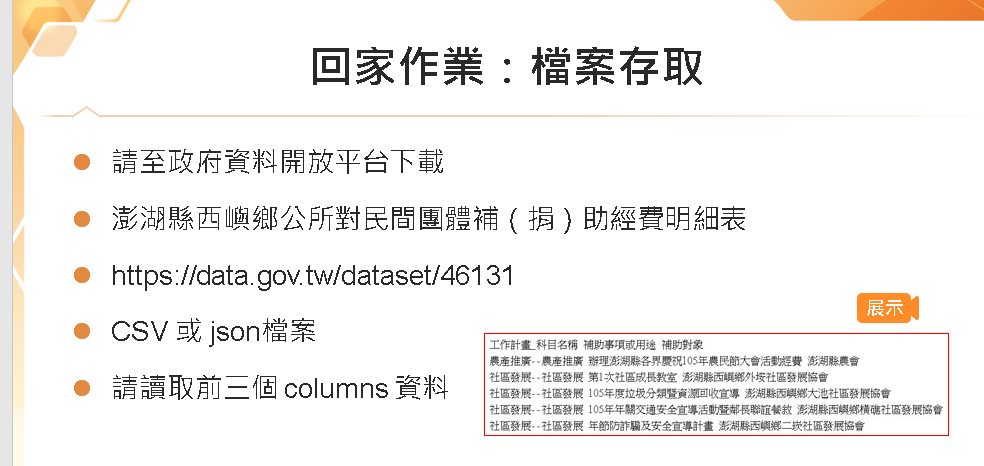
下載json網址:http://opendataap2.penghu.gov.tw/resource/files/2021-03-31/42c8286112bff4bc191ed998df3abaf1.json